In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data=pd.read_csv(r'C:\\Users\\LasimaSN\\Downloads\\The Data Science Course 2020 - All Resources\\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S38_L256\3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


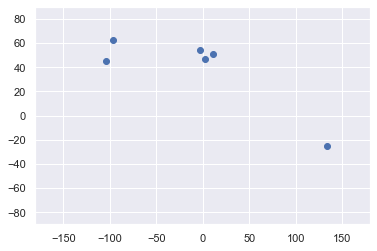

In [2]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [3]:
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [4]:
km=KMeans(2)

In [5]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
identify_clusters=km.fit_predict(x)

In [7]:
identify_clusters

array([0, 0, 0, 0, 0, 1])

In [8]:
data_with_clusters=data.copy()
data_with_clusters['Clusters']=identify_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


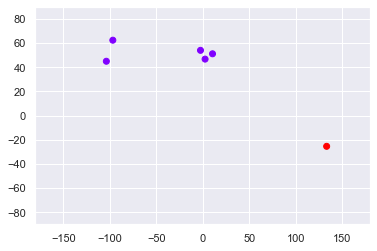

In [9]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [10]:
k=KMeans(2)

In [11]:
k.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
second=k.fit_predict(x)

In [13]:
second

array([0, 0, 0, 0, 0, 1])

In [14]:
second_data=data.copy()
second_data['Clusters']=second
second_data

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


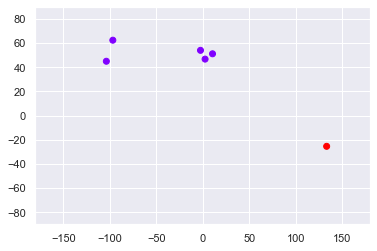

In [15]:
plt.scatter(second_data['Longitude'],second_data['Latitude'],c=second_data['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [16]:
km.inertia_

13205.758119999999

In [17]:
wcss=[]
for i in range(1,7):
    km=KMeans(i)
    km.fit(x)
    wcss_iter=km.inertia_
    wcss.append(wcss_iter)

In [18]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

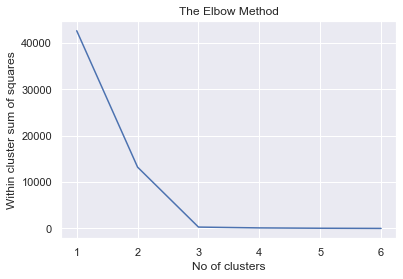

In [19]:
number_cluster=range(1,7)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Within cluster sum of squares')

plt.show()